In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.metrics import*
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import math
from boruta import BorutaPy
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Model Selected: ExtraTreeRegressor

In [3]:
dataset = pd.read_csv('./Documents/Revised_data.csv')
dataset = dataset.drop('date',1)
dataset = dataset.drop('Date_number',1)
dataset = dataset.drop('Time',1)
dataset = dataset.drop('Day_of_week',1)

In [4]:
X = dataset.iloc[:,3:31].values
Y = dataset.iloc[:,31].values

In [5]:
features = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 3]

In [13]:
dataset.iloc[: , 3:31].columns

Index(['Kitchen_Temp', 'Kitchen_Hum', 'LivingRoom_Temp', 'LivingRoom_Hum',
       'LaundryRoom_Temp', 'LaundryRoom_Hum', 'OfficeRoom_Temp',
       'OfficeRoom_Hum', 'BathRoom_Temp', 'BathRoom_Hum', 'OutsideNorth_Temp',
       'OutsideNorth_Hum', 'IroningRoom_Temp', 'IroningRoom_Hum',
       'TeenagerRoom_Temp', 'TeenagerRoom_Hum', 'ParentRoom_Temp',
       'ParentRoom_Hum', 'Outside_Temp', 'Pressure', 'Humidity', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'Month_Number', 'Weekday_number',
       'Weekday_Column'],
      dtype='object')

In [5]:
new_data = dataset[['Kitchen_Temp', 'Kitchen_Hum', 'LivingRoom_Temp', 'LivingRoom_Hum',
       'LaundryRoom_Temp', 'LaundryRoom_Hum', 'OfficeRoom_Temp',
       'OfficeRoom_Hum', 'BathRoom_Temp', 'BathRoom_Hum', 'OutsideNorth_Temp',
       'OutsideNorth_Hum', 'IroningRoom_Temp', 'IroningRoom_Hum',
       'TeenagerRoom_Temp', 'TeenagerRoom_Hum', 'ParentRoom_Temp',
       'ParentRoom_Hum', 'Outside_Temp', 'Pressure', 'Humidity', 'Windspeed',
       'Visibility', 'Tdewpoint', 'Month_Number', 'Weekday_number']]

In [6]:
X = new_data.values
Y = dataset.iloc[:,31].values
X_train, X_test, Y_train, Y_test = train_test_split(new_data, Y, test_size=0.2, random_state=np.random)

In [16]:
etc = ExtraTreesRegressor()

In [43]:
etc.fit(X_train,Y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

# Cross Validation

In [44]:
#Simple K-Fold cross validation - Training Data. 10folds.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=ExtraTreesRegressor(), X=X_train, y=Y_train,cv=10)
accuracies.mean()

0.5677751738664408

In [46]:
#Simple K-Fold cross validation - Testing Data . 10folds.
from sklearn.linear_model import LinearRegression
accuracies = cross_val_score(estimator=ExtraTreesRegressor(), X=X_test, y=Y_test,cv=10)
accuracies.mean()

0.37824809179157814

# Cross Validation for Random Forest 

In [37]:
dataset = pd.read_csv('./Documents/Revised_Data.csv')
dataset.head()

,Unnamed: 0,date,Appliances,lights,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,...,Visibility,Tdewpoint,rv1,Day_of_week,Month_Number,Time,Date_number,Weekday_number,Weekday_Column,Energy_consumed
0,0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,63.000000,5.3,13.275433,Monday,1,17:00:00,2016-01-11,0,0,90
1,1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,59.166667,5.2,18.606195,Monday,1,17:10:00,2016-01-11,0,0,90
2,2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,55.333333,5.1,28.642668,Monday,1,17:20:00,2016-01-11,0,0,80
3,3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,51.500000,5.0,45.410389,Monday,1,17:30:00,2016-01-11,0,0,90
4,4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,47.666667,4.9,10.084097,Monday,1,17:40:00,2016-01-11,0,0,100


In [38]:
dataset = dataset.drop('date',1)
dataset = dataset.drop('Date_number',1)
dataset = dataset.drop('Time',1)
dataset = dataset.drop('Day_of_week',1)
dataset = dataset.drop('Weekday_Column',1)
dataset = dataset.drop('Weekday_number',1)
dataset = dataset.drop('Month_Number',1)
dataset = dataset.drop('Tdewpoint',1)

In [39]:
X = dataset.iloc[:,3:27].values
Y = dataset.iloc[:, 27].values

In [40]:
rfc = RandomForestRegressor(n_estimators=100,random_state=np.random)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=np.random)
rfc.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False,
           random_state=<module 'numpy.random' from 'C:\\Users\\rishi\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
           verbose=0, warm_start=False)

In [41]:
#Simple K-Fold cross validation - Training Data. 10folds.
accuracies = cross_val_score(estimator=RandomForestRegressor(), X=X_train, y=Y_train,cv=10)
accuracies.mean()

0.48985794649186704

In [42]:
#Simple K-Fold cross validation - Testing Data . 10folds.
from sklearn.linear_model import LinearRegression
accuracies = cross_val_score(estimator= RandomForestRegressor, X=X_test, y=Y_test,cv=10)
accuracies.mean()

0.15735624573459123

# Regularization

# Lasso Regularization - L1

In [7]:
from sklearn.linear_model import Lasso
##Training the model
lassoReg = Lasso(alpha=0.005,normalize=True)
lassoReg.fit(X_train,Y_train)
pred = lassoReg.predict(X_test)
##Calculating MSE
MSE = np.mean((pred-Y_test)**2)
print('MSE = ',MSE)
##Calculating Score
print('score = ',lassoReg.score(X_test,Y_test))

MSE =  9787.331925665841
score =  0.1312752512029608


# Ridge REgression - L2

In [8]:
from sklearn.linear_model import Ridge
##Training the model
ridgeReg = Ridge(alpha=0.05,normalize=True)
ridgeReg.fit(X_train,Y_train)
pred = ridgeReg.predict(X_test)
##Calculating MSE
MSE = np.mean((pred-Y_test)**2)
print('MSE = ',MSE)
##Calculating Score
print('score = ',ridgeReg.score(X_test,Y_test))

MSE =  9839.902975870638
score =  0.1266090385180313


# Elastic Regression  

In [10]:
from sklearn.linear_model import ElasticNet
##Training the model
ENReg = ElasticNet(alpha=1,l1_ratio=0.5,normalize=False)
ENReg.fit(X_train,Y_train)
pred = ENReg.predict(X_test)
##Calculating MSE
MSE = np.mean((pred-Y_test)**2)
print('MSE = ',MSE)
##Calculating Score
print('score = ',ENReg.score(X_test,Y_test))

MSE =  9892.615167382928
score =  0.12193029811381839


# Grid Search - Extra Tree

In [11]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    "n_estimators": [300,400,500,600,800],
    "max_features": ["log2"],
    "max_depth": [50,100,150]
}

# Create a based model
sel_model = ExtraTreesRegressor(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = sel_model, param_grid = param_grid, 
                          cv = 3, n_jobs = 2, verbose = 2)


In [12]:
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:  4.6min finished


{'max_depth': 50, 'max_features': 'log2', 'n_estimators': 800}

# Bias - Variance Trade Off 

In [23]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [17]:
dataset = pd.read_csv('./Documents/Revised_data.csv')
dataset = dataset.drop('date',1)
dataset = dataset.drop('Date_number',1)
dataset = dataset.drop('Time',1)
dataset = dataset.drop('Day_of_week',1)

In [19]:
X = dataset.iloc[:,3:31].values
Y = dataset.iloc[:,31].values

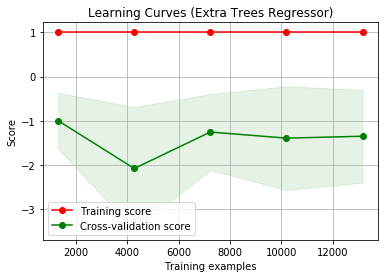

In [24]:
title = "Learning Curves (Extra Trees Regressor)"
estimator = ExtraTreesRegressor()
plot_learning_curve(estimator, title, X, Y, cv=3, n_jobs=4)
plt.show()

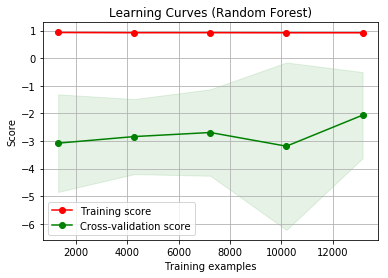

In [26]:
title = "Learning Curves (Random Forest)"
estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, Y, cv=3, n_jobs=4)
plt.show()